# Overview of this jupyter notebook

1. Loading screwing data
2. Plot representative curve of each classes
3. Plot average curve shape in the initial phase
4. Plot rising point of the curves
5. Plot maximum value of the curves
6. Save curves as a dataframe

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
import itertools  
import importlib
from library import etl_helper as etl   # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc          # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\etl_helper.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>


# 1. Loading screwing data

In [2]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube',
           '16_Klasse', '24_Klasse', '27_Klasse', 
           '35_Klasse', '37_Klasse', '267_Klasse', '357_Klasse']

In [3]:
main_path = "..\\03_Schraubprozessdaten\\kombinierte_klassen\\"
folders = os.listdir(main_path)
folders

['class16', 'class24', 'class267', 'class27', 'class35', 'class357', 'class37']

In [4]:
df16, len_curves = etl.load_data(main_path, folders='class16', fname="\\class16_", downsample=20, file_amount=100)
df24, len_curves = etl.load_data(main_path, folders='class24', fname="\\class24_", downsample=20, file_amount=100)
df27, len_curves = etl.load_data(main_path, folders='class27', fname="\\class27_", downsample=20, file_amount=100)
df35, len_curves = etl.load_data(main_path, folders='class35', fname="\\class35_", downsample=20, file_amount=100)
df37, len_curves = etl.load_data(main_path, folders='class37', fname="\\class37_", downsample=20, file_amount=100)
df267, len_curves = etl.load_data(main_path, folders='class267', fname="\\class267_", downsample=20, file_amount=100)
df357, len_curves = etl.load_data(main_path, folders='class357', fname="\\class357_", downsample=20, file_amount=100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [6]:
df0.shape, df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape

((775, 800),
 (931, 200),
 (812, 200),
 (697, 200),
 (803, 200),
 (766, 200),
 (743, 200),
 (748, 200))

In [7]:
df16.shape, df24.shape, df27.shape, df35.shape, df37.shape, df267.shape, df357.shape

((877, 100),
 (816, 100),
 (774, 100),
 (728, 100),
 (716, 100),
 (778, 100),
 (729, 100))

In [8]:
df_com = [df0, df1, df2, df3, df4, df5, df6, df7, df16, df24, df27, df35, df37, df267, df357]
length = []

for i in df_com:
    length.append(i.shape[1])
    
length

[800, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100]

In [9]:
class_sector = [0] + list(itertools.accumulate(length))
class_sector

[0,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900]

In [10]:
df = etl.concat_df(df_com, shift_curves=False)
df = df.iloc[:920]
df

,0,1,2,3,4,5,6,7,8,9,...,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.03136,0.01344,0.02688,0.02240
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.02688,0.01344,0.02688,0.02240
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.01792,0.01792,0.00896,0.00000,0.00448,0.00448,0.00896,0.01344,0.01792,0.00896
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00448,0.00448,0.00448,0.00448,0.00000,0.00000,0.00448,0.00896,0.00896,0.00448
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.01792,0.01792,0.00896,0.00448,0.00000,0.00896,0.00896,0.01792,0.01792,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# 2. Plot representative curve of each classes

In [11]:
import matplotlib.colors as mc

def mix_colors(color1, color2, color3=None):
    
    c1 = np.array(mc.to_rgb(color1))*255
    c2 = np.array(mc.to_rgb(color2))*255
    
    if color3==None:
        mix_color = ((c1 + c2) // 2).astype(int)
    else:
        c3 = np.array(mc.to_rgb(color3))*255
        mix_color = ((c1 + c2 + c3) // 3).astype(int) 
          
    hex_color = '#%02x%02x%02x' % tuple(mix_color)
    
    return hex_color

In [12]:
c16 = mix_colors(fapsc.dark_green, fapsc.red)
c24 = mix_colors(fapsc.yellow, fapsc.blue)
c27 = mix_colors(fapsc.yellow, fapsc.black)
c35 = mix_colors(fapsc.orange, fapsc.grey_0)
c37 = mix_colors(fapsc.orange, fapsc.black)
c267 = mix_colors(fapsc.yellow, fapsc.red, fapsc.black)
c357 = mix_colors(fapsc.orange, fapsc.grey_0, fapsc.black)

c16, c24, c27, c35, c37, c267, c357 

('#6e4213', '#7f7d36', '#7f6500', '#ba814f', '#7a410f', '#9e4d0c', '#7c5635')

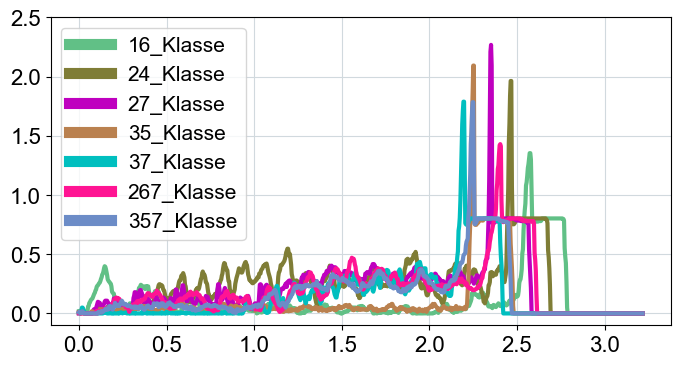

In [14]:
plt.figure(figsize=(8,4), dpi=100)
plt.rcParams['font.family'] = ['Arial']
#plt.xlabel("Zeit in Sekunden", fontsize=16)
#plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.1, 2.5)
linewidth = 3

#plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[8]+92]], fapsc.dark_green_light, label=classes[8], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[9]+8]], c24, label=classes[9], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[10]+25]], color="m", label=classes[10], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[11]]], c35, label=classes[11], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[12]+3]], color="c", label=classes[12], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[13]+17]], color="deeppink", label=classes[13], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[14]+4]], color=fapsc.blue_light, label=classes[14], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=15)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

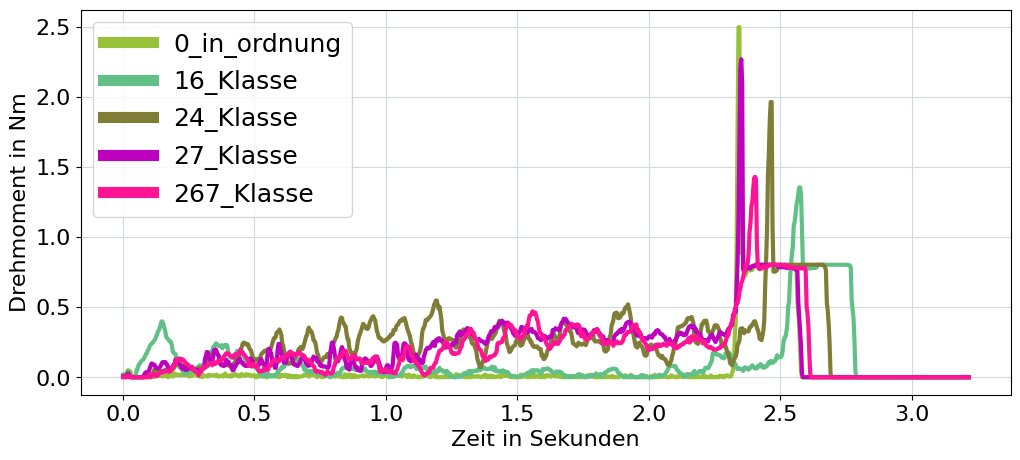

In [17]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[8]+92]], fapsc.dark_green_light, label=classes[8], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[9]+8]], c24, label=classes[9], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[10]+25]], color="m", label=classes[10], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[11]+9]], c35, label=classes[11], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[12]+1]], color="c", label=classes[12], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[13]+17]], color="deeppink", label=classes[13], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[14]+4]], color=fapsc.blue_light, label=classes[14], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=18)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

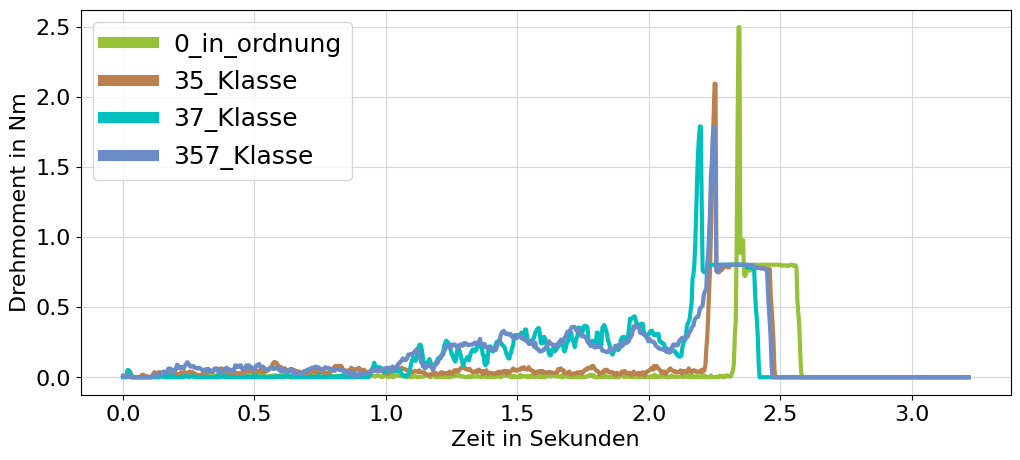

In [18]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[8]]], fapsc.dark_green_light, label=classes[8], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[9]]], c24, label=classes[9], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[10]]], color="m", label=classes[10], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[11]]], c35, label=classes[11], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[12]+3]], color="c", label=classes[12], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[13]+117]], color="deeppink", label=classes[13], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[14]+4]], color=fapsc.blue_light, label=classes[14], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=18)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

# 3. Plot average curve shape in the initial phase

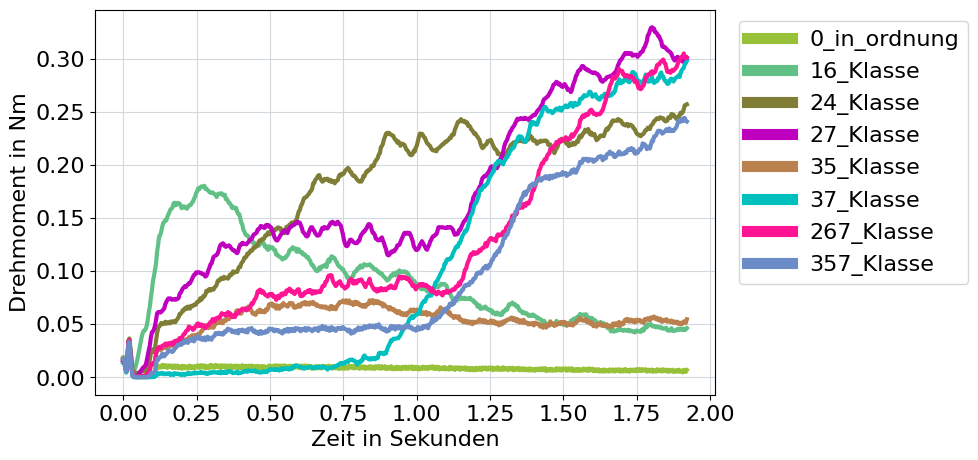

In [40]:
plt.figure(figsize=(8,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3
data_points = 550

plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[0]:class_sector[1]]].iloc[:data_points], axis=1), fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[8]:class_sector[9]]].iloc[:data_points], axis=1), fapsc.dark_green_light, label=classes[8], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[9]:class_sector[10]]].iloc[:data_points], axis=1), c24, label=classes[9], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[10]:class_sector[11]]].iloc[:data_points], axis=1), "m", label=classes[10], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[11]:class_sector[12]]].iloc[:data_points], axis=1), c35, label=classes[11], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[12]:class_sector[13]]].iloc[:data_points], axis=1), "c", label=classes[12], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[13]:class_sector[14]]].iloc[:data_points], axis=1), "deeppink", label=classes[13], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[14]:class_sector[15]]].iloc[:data_points], axis=1), fapsc.blue_light, label=classes[14], linewidth=linewidth)

leg = plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=16)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

# 4. Plot rising point of the curves

In [16]:
rising_point_single = etl.get_rising_point(df[df.columns[:2200]])
rising_point_single_time = np.array(rising_point_single) * 0.0035
rising_single_time = rising_point_single_time[600:]
rising_single_time.shape

df_rise_single = pd.DataFrame(rising_single_time.reshape(-1, 200), index=classes[:8])
df_rise_single = df_rise_single.transpose()
df_rise_single

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube
0,2.3345,2.4640,2.4465,2.1560,2.3555,2.3380,2.2470,2.3240
1,2.3310,2.6005,2.4745,2.0615,2.1945,2.2995,2.1875,2.2890
2,2.3310,2.6005,2.4360,1.9250,2.4080,2.3415,2.1875,2.3030
3,2.2925,2.5235,2.4010,1.9215,2.3625,2.3450,2.1945,2.2995
4,2.3170,2.6775,2.4150,1.9635,2.3730,2.3590,2.1945,2.2820
...,...,...,...,...,...,...,...,...
195,2.3835,2.7895,2.3485,2.1910,2.3555,2.4010,2.2015,2.2855
196,2.3730,2.5935,2.3660,2.1665,2.3450,2.4220,2.1840,2.2995
197,2.3765,2.5795,2.3905,2.1875,2.4710,2.4045,2.1140,2.3065
198,2.3555,2.5830,2.3835,2.1140,2.3975,2.3765,2.1665,2.3380


In [17]:
rising_point_com = etl.get_rising_point(df[df.columns[2200:]])
rising_com_time = np.array(rising_point_com) * 0.0035
rising_com_time.shape

df_rise_com = pd.DataFrame(rising_com_time.reshape(-1, 100), index=classes[8:])
df_rise_com = df_rise_com.transpose()
df_rise_com

,16_Klasse,24_Klasse,27_Klasse,35_Klasse,37_Klasse,267_Klasse,357_Klasse
0,2.6635,2.4220,2.3660,2.2365,2.0930,2.2820,2.1525
1,2.5095,2.4675,2.3695,2.2330,2.0965,2.3485,2.2190
2,2.4815,2.3905,2.4220,2.2155,2.0895,2.2890,2.2330
3,2.8140,2.3555,2.3940,2.1525,2.1735,2.3800,2.1770
4,2.7440,2.3905,2.4360,2.1455,2.1210,2.4640,2.2225
...,...,...,...,...,...,...,...
95,2.5515,2.4220,2.3520,2.1840,2.1175,2.3590,2.2260
96,2.6705,2.3205,2.3800,2.2575,2.1105,2.3380,2.1840
97,2.8245,2.6110,2.3870,2.1385,2.1805,2.3590,2.2190
98,2.6355,2.4955,2.3975,2.2330,2.1700,2.3730,2.2680


In [18]:
df_rise = pd.concat([df_rise_single, df_rise_com], axis=1)
df_rise

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube,16_Klasse,24_Klasse,27_Klasse,35_Klasse,37_Klasse,267_Klasse,357_Klasse
0,2.3345,2.4640,2.4465,2.1560,2.3555,2.3380,2.2470,2.3240,2.6635,2.4220,2.3660,2.2365,2.0930,2.2820,2.1525
1,2.3310,2.6005,2.4745,2.0615,2.1945,2.2995,2.1875,2.2890,2.5095,2.4675,2.3695,2.2330,2.0965,2.3485,2.2190
2,2.3310,2.6005,2.4360,1.9250,2.4080,2.3415,2.1875,2.3030,2.4815,2.3905,2.4220,2.2155,2.0895,2.2890,2.2330
3,2.2925,2.5235,2.4010,1.9215,2.3625,2.3450,2.1945,2.2995,2.8140,2.3555,2.3940,2.1525,2.1735,2.3800,2.1770
4,2.3170,2.6775,2.4150,1.9635,2.3730,2.3590,2.1945,2.2820,2.7440,2.3905,2.4360,2.1455,2.1210,2.4640,2.2225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.3835,2.7895,2.3485,2.1910,2.3555,2.4010,2.2015,2.2855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2.3730,2.5935,2.3660,2.1665,2.3450,2.4220,2.1840,2.2995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,2.3765,2.5795,2.3905,2.1875,2.4710,2.4045,2.1140,2.3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,2.3555,2.5830,2.3835,2.1140,2.3975,2.3765,2.1665,2.3380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def box_plot_color(ax, data, edge_color, fill_color, vert):
    bp = ax.boxplot(data, patch_artist=True, showmeans=True, vert=vert,
                    meanprops={"marker":"o",
                               "markerfacecolor":"black", 
                               "markeredgecolor":"black",
                               "markersize":"6"})
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth=2)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

C:\Users\songs\AppData\Local\Temp\ipykernel_14884\3712666199.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classes[7::-1], fontsize=14)


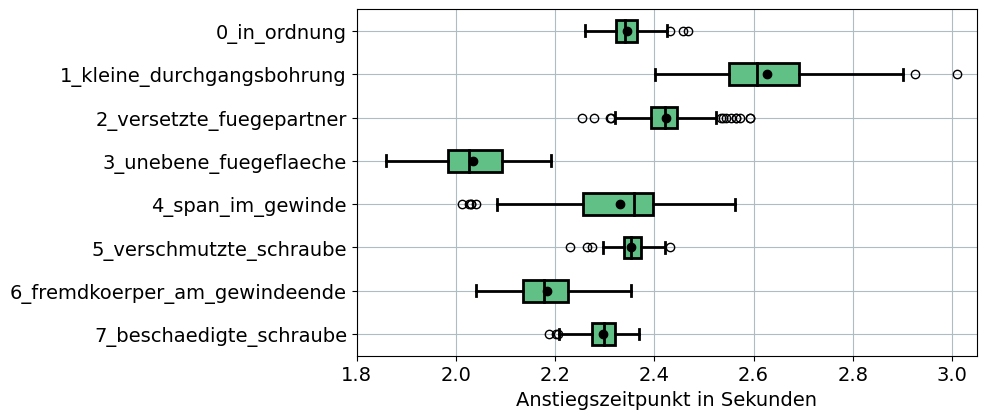

In [28]:
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=100)
plt.xticks(fontsize=14)
ax.set_yticklabels(classes[7::-1], fontsize=14)
plt.xlabel("Anstiegszeitpunkt in Sekunden", fontsize=14)
plt.xlim(1.8, 3.05)
box_plot_color(ax, df_rise_single[df_rise_single.columns[::-1]], fapsc.black, fapsc.dark_green_light, vert=False)
plt.grid(color=fapsc.grey_2, linestyle='-')
plt.show()

C:\Users\songs\AppData\Local\Temp\ipykernel_14884\2922601194.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classes[::-1], fontsize=14)


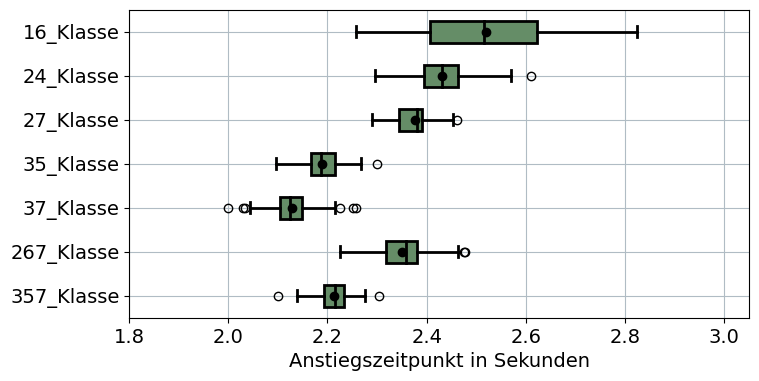

In [27]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
plt.xticks(fontsize=14)
ax.set_yticklabels(classes[::-1], fontsize=14)
plt.xlabel("Anstiegszeitpunkt in Sekunden", fontsize=14)
plt.xlim(1.8, 3.05)
box_plot_color(ax, df_rise_com[df_rise_com.columns[::-1]], fapsc.black, fapsc.dark_green_house, vert=False)
plt.grid(color=fapsc.grey_2, linestyle='-')
plt.show()

# 5. Plot maximum value of the curves

In [22]:
max_val_single = np.array(etl.get_max_values(df[df.columns[:2200]]))
max_val_single = max_val_single[600:].reshape(-1, 200)

df_max_single = pd.DataFrame(max_val_single, index=classes[:8])
df_max_single = df_max_single.transpose().iloc[:100]
df_max_single

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube
0,2.44160,2.38784,2.15936,2.24448,2.23552,2.16384,1.18720,2.26240
1,2.49536,1.93536,1.92192,2.17280,2.32960,2.33408,1.14688,1.97120
2,2.46848,2.15488,2.01600,2.16832,2.14144,2.17280,1.34848,2.03840
3,2.29824,2.28928,1.21408,2.13248,1.68000,2.36096,1.27680,2.10112
4,2.24000,2.34304,2.43712,2.31168,1.91296,2.23552,1.16480,1.94880
...,...,...,...,...,...,...,...,...
95,2.40128,2.23552,2.17280,2.21312,2.20416,2.28032,1.27232,2.06528
96,2.50432,2.07872,2.27136,2.11456,0.88704,2.25792,1.31712,2.46848
97,2.30720,2.19968,2.31168,2.18624,0.96320,2.09216,1.18272,2.00704
98,2.21312,2.27584,2.28480,2.28928,2.02944,2.49536,1.24992,2.40576


In [23]:
max_val_com = np.array(etl.get_max_values(df[df.columns[2200:]]))
max_val_com = max_val_com.reshape(-1, 100)

df_max_com = pd.DataFrame(max_val_com, index=classes[8:])
df_max_com = df_max_com.transpose()
df_max_com

,16_Klasse,24_Klasse,27_Klasse,35_Klasse,37_Klasse,267_Klasse,357_Klasse
0,1.75616,2.11008,2.14592,2.09216,1.80096,1.20512,1.82336
1,1.40224,2.22208,2.02048,2.04736,1.80544,1.18720,1.94432
2,1.59488,2.15040,2.26688,2.02496,1.64416,1.26336,1.88160
3,1.63968,2.30720,2.27584,2.02496,1.78752,1.12896,1.80992
4,1.64864,2.04288,2.30272,2.00704,1.85024,1.49184,1.78304
...,...,...,...,...,...,...,...
95,1.63072,2.16832,2.06976,2.02048,1.82784,1.18272,1.86368
96,1.35296,2.26688,2.29376,2.10112,1.80992,1.16480,1.90848
97,1.50976,2.17728,2.29376,2.09664,1.78752,1.17376,1.78304
98,1.32160,2.15488,2.34752,1.98912,1.75168,1.13792,2.02048


In [24]:
df_max = pd.concat([df_max_single, df_max_com], axis=1)
df_max

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube,16_Klasse,24_Klasse,27_Klasse,35_Klasse,37_Klasse,267_Klasse,357_Klasse
0,2.44160,2.38784,2.15936,2.24448,2.23552,2.16384,1.18720,2.26240,1.75616,2.11008,2.14592,2.09216,1.80096,1.20512,1.82336
1,2.49536,1.93536,1.92192,2.17280,2.32960,2.33408,1.14688,1.97120,1.40224,2.22208,2.02048,2.04736,1.80544,1.18720,1.94432
2,2.46848,2.15488,2.01600,2.16832,2.14144,2.17280,1.34848,2.03840,1.59488,2.15040,2.26688,2.02496,1.64416,1.26336,1.88160
3,2.29824,2.28928,1.21408,2.13248,1.68000,2.36096,1.27680,2.10112,1.63968,2.30720,2.27584,2.02496,1.78752,1.12896,1.80992
4,2.24000,2.34304,2.43712,2.31168,1.91296,2.23552,1.16480,1.94880,1.64864,2.04288,2.30272,2.00704,1.85024,1.49184,1.78304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.40128,2.23552,2.17280,2.21312,2.20416,2.28032,1.27232,2.06528,1.63072,2.16832,2.06976,2.02048,1.82784,1.18272,1.86368
96,2.50432,2.07872,2.27136,2.11456,0.88704,2.25792,1.31712,2.46848,1.35296,2.26688,2.29376,2.10112,1.80992,1.16480,1.90848
97,2.30720,2.19968,2.31168,2.18624,0.96320,2.09216,1.18272,2.00704,1.50976,2.17728,2.29376,2.09664,1.78752,1.17376,1.78304
98,2.21312,2.27584,2.28480,2.28928,2.02944,2.49536,1.24992,2.40576,1.32160,2.15488,2.34752,1.98912,1.75168,1.13792,2.02048


In [25]:
cl_names = ["Kl_0", "Kl_1", "Kl_2", "Kl_3", "Kl_4", "Kl_5", "Kl_6", "Kl_7", 
            "Kl_16", "Kl_24", "Kl_27", "Kl_35", "Kl_37", "Kl_267", "Kl_357"]

In [44]:
cl_names = ["0", "1", "2", "3", "4", "5", "6", "7", 
            "16", "24", "27", "35", "37", "267", "357"]

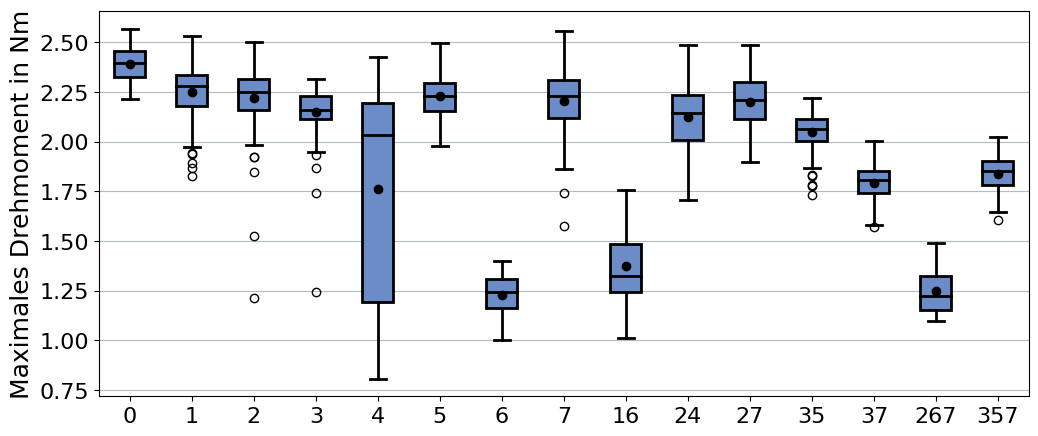

In [47]:
fig, ax = plt.subplots(figsize=(12,5), dpi=100)
box_plot_color(ax, df_max, fapsc.black, fapsc.blue_light, vert=True)

ax.set_axisbelow(True)
plt.yticks(fontsize=16)
plt.ylabel("Maximales Drehmoment in Nm", fontsize=18)
#ax.set_title(title, fontsize=15)
#ax.set_ylabel('Ergebnisse der Testdaten', fontsize=15)
#ax.set_ylim(lower, upper)
ax.set_xticklabels(cl_names, fontsize=16)


ax.yaxis.grid(color=fapsc.grey_2, linestyle='-')
#ax.tick_params(axis='both', labelsize=15)

plt.show()


# 6. Save curves as a dataframe

In [7]:
etl.save_df(df16, "df16_v2")

dataframe df16_v2 is saved


In [8]:
etl.save_df(df24, "df24_v2")

dataframe df24_v2 is saved


In [10]:
etl.save_df(df27, "df27_v2")

dataframe df27_v2 is saved


In [11]:
etl.save_df(df35, "df35_v2")

dataframe df35_v2 is saved


In [12]:
etl.save_df(df37, "df37_v2")

dataframe df37_v2 is saved


In [14]:
etl.save_df(df267, "df267_v2")

dataframe df267_v2 is saved


In [15]:
etl.save_df(df357, "df357_v2")

dataframe df357_v2 is saved
